/tmp/ipykernel_5367/1177124765.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  se.barplot(data=top_sales, x='Sales', y='Product Type', palette='Blues_d')
/tmp/ipykernel_5367/1177124765.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  se.barplot(data=top_profit, x='Profit', y='Product Type', palette='Greens_d')


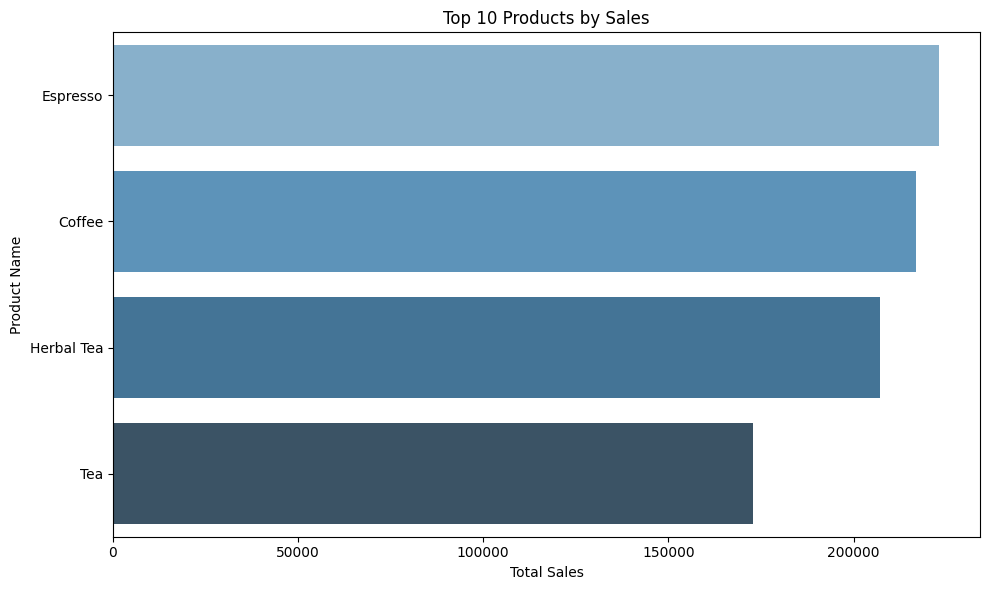

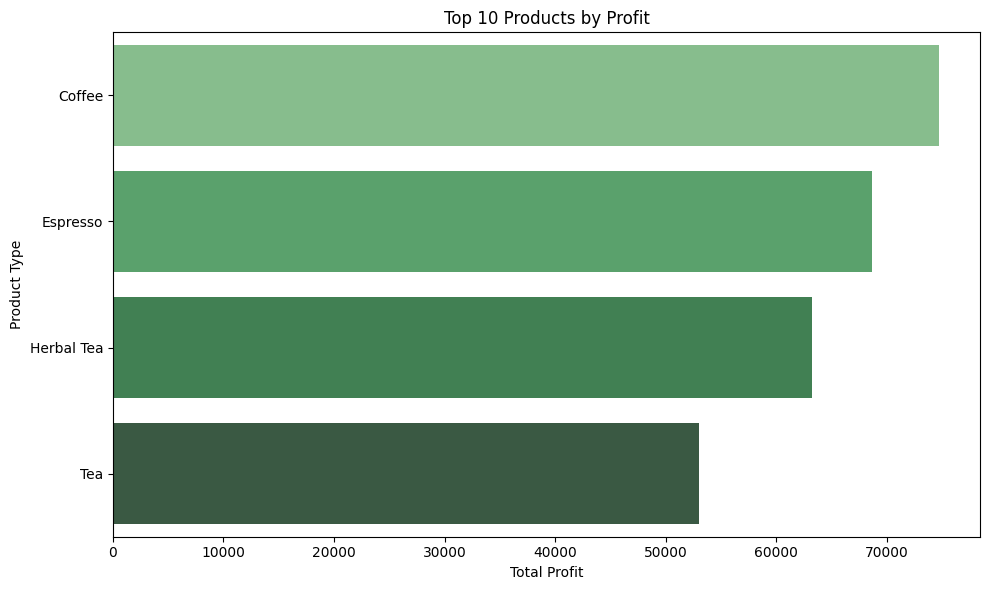

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se

class Retail_Sales:
    def mainfx(self):
        data = pd.read_csv('/home/happy/Downloads/sales.csv')
        region_dict = data.groupby('Market')['Sales'].sum().to_dict()
        state_dict = data.groupby('State')['Sales'].sum().to_dict()
        product_tpe = data.groupby('Product Type')['Sales'].sum().to_dict()

        sales = data['Sales'].sum()
        budget_sal = data['Budget Sales'].sum()
        profit = data['Profit'].sum()
        margin = data['Margin'].sum()
        COGS = data['COGS'].sum()

        # Heatmap plotting
        # Sales by region 
        sales_region = data.pivot_table(index='Market', values='Sales', aggfunc='sum')
        se.heatmap(sales_region, cmap="YlGnBu", annot=True)

        # Sales by state
        sales_state = data.pivot_table(index='State', values='Sales', aggfunc='sum')
        se.heatmap(sales_state,cmap="YlGnBu", annot=True)

        # Sales by market 
        sales_market = data.pivot_table(index='Market', values='Sales', aggfunc='sum')
        se.heatmap(sales_market,cmap="YlGnBu", annot=True)

       # Pivot table: total sales per product type
        pro_sale = data.pivot_table(index='Product Type', values='Sales', aggfunc='sum')

        # Plot as pie chart using Matplotlib
        plt.figure(figsize=(8, 6))
        pro_sale.plot.pie(y='Sales', autopct='%1.1f%%', legend=False)
        plt.ylabel("")  # Remove y-label
        plt.title("Sales Distribution by Product Type")
        plt.tight_layout()
        plt.show()


        # Top 10 products by sales
        top_sales = data.groupby('Product Type')['Sales'].sum().nlargest(10).reset_index()

        plt.figure(figsize=(10, 6))
        se.barplot(data=top_sales, x='Sales', y='Product Type', palette='Blues_d')
        plt.title('Top 10 Products by Sales')
        plt.xlabel('Total Sales')
        plt.ylabel('Product Name')
        plt.tight_layout()
        plt.savefig("top_sales.png", dpi=300, bbox_inches='tight')

        # Top 10 products by profit
        top_profit = data.groupby('Product Type')['Profit'].sum().nlargest(10).reset_index()

        plt.figure(figsize=(10, 6))
        se.barplot(data=top_profit, x='Profit', y='Product Type', palette='Greens_d')
        plt.title('Top 10 Products by Profit')
        plt.xlabel('Total Profit')
        plt.ylabel('Product Type')
        plt.tight_layout()
        plt.savefig("top_profit.png", dpi=300, bbox_inches='tight')

if __name__=='__main__':
    cl = Retail_Sales()
    cl.mainfx()